# Importing Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Getting the data

In [28]:
retail = pd.read_csv(r"C:\Users\megha\Downloads\SampleSuperstore.csv")
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Getting information about dataset

In [29]:
# Finding the shape of the dataset
retail.shape

(9994, 13)

In [30]:
# Getting column names
retail.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [31]:
# Getting other information about the columns (their types etc.)
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [32]:
# checking for null values
retail.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [33]:
# Gettting the description of the dataset
retail.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [34]:
# Getting the number of unique values of each column
retail.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [35]:
# Country and Postal Code give us no information. Dropping the two columns

retail.drop(['Country','Postal Code'], axis = 1, inplace = True)

In [36]:
retail.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Exploratory Data Analysis

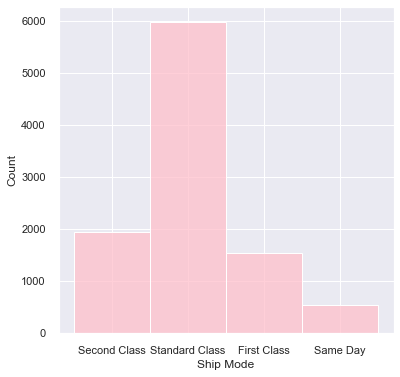

In [39]:
# Ship mode

plt.figure(figsize=[6,6])
sns.set_theme()
sns.histplot(data = retail, x = 'Ship Mode', color='pink')
plt.show()

##### Standard Class Ship Mode has the highest count

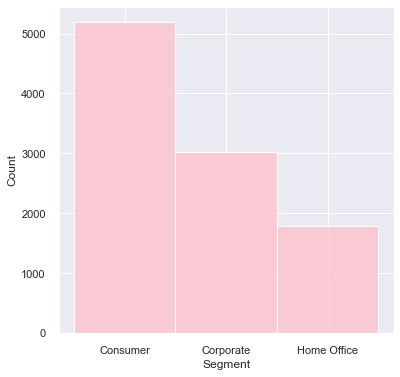

In [40]:
# Segment

plt.figure(figsize=[6,6])
sns.set_theme()
sns.histplot(data = retail, x = 'Segment', color='pink')
plt.show()

##### Consumer segment has the highest count

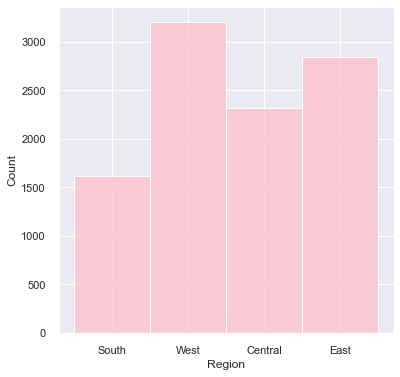

In [41]:
plt.figure(figsize=[6,6])
sns.set_theme()
sns.histplot(data = retail, x = 'Region', color='pink')
plt.show()

##### West region has the highest count

### Using PairPlot to find relations in dataset

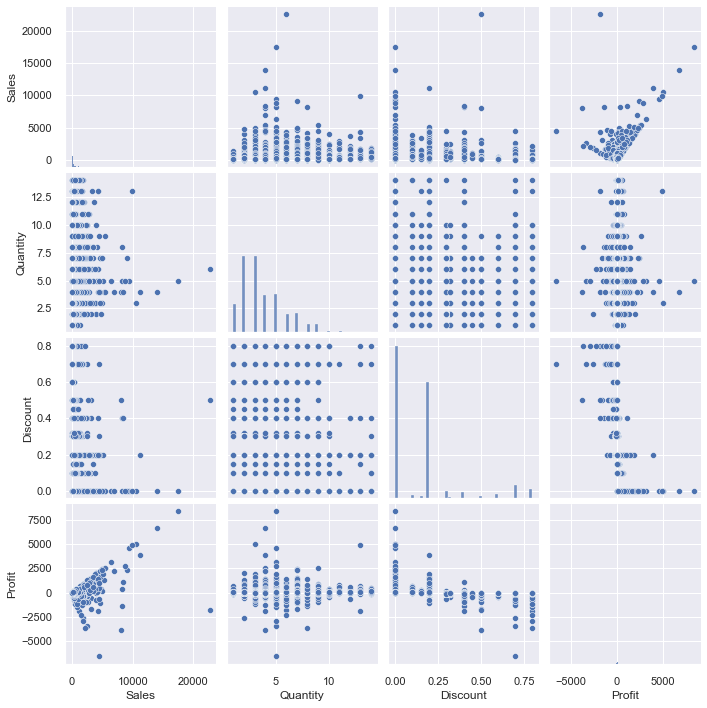

In [42]:
sns.pairplot(retail)

### Ship mode vs. Segment

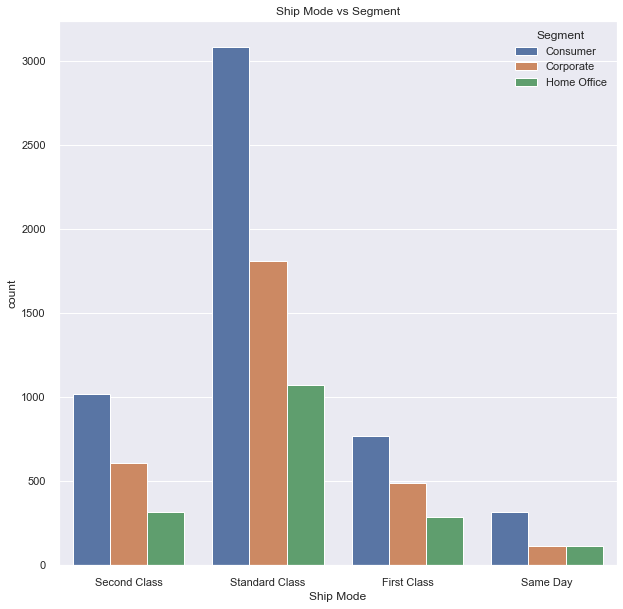

In [43]:
plt.figure(figsize=(10, 10))
sns.countplot(x = 'Ship Mode',hue='Segment',data= retail)
plt.title('Ship Mode vs Segment')
plt.show()


### Line plot between profit and discount


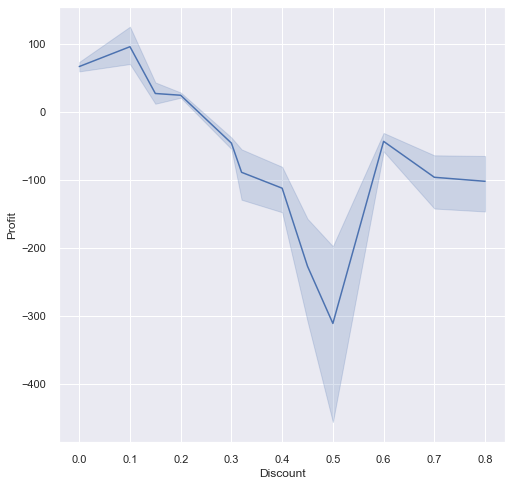

In [44]:
plt.figure(figsize=[8,8])
sns.lineplot(data = retail, x = 'Discount', y = 'Profit')
plt.show()

### Segment VS Category

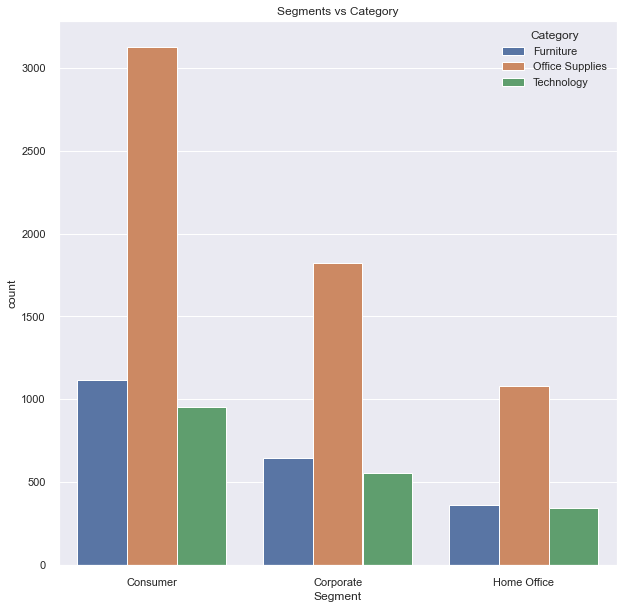

In [45]:
plt.figure(figsize=(10, 10))
sns.countplot(x = 'Segment',hue='Category',data= retail)
plt.title('Segments vs Category')
plt.show()

### Region VS Sales

Text(0.5, 1.0, 'Region VS Sales')

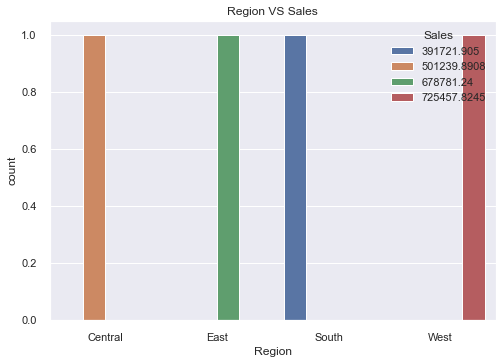

In [46]:
data = retail.groupby(["Region"]).Sales.sum().reset_index()
sns.countplot(x = 'Region',hue='Sales',data= data)
plt.title('Region VS Sales')

### Category VS Sales


Text(0.5, 1.0, 'Category VS Sales')

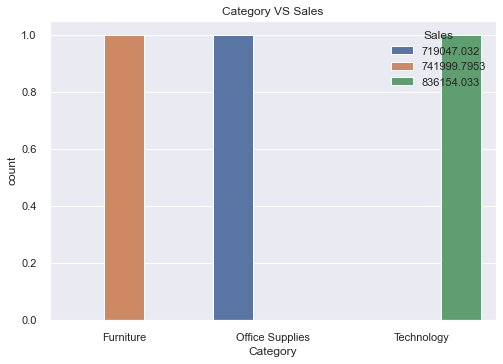

In [47]:
data = retail.groupby(["Category"]).Sales.sum().reset_index()
sns.countplot(x = 'Category',hue='Sales',data= data)
plt.title('Category VS Sales')

### Region VS Category

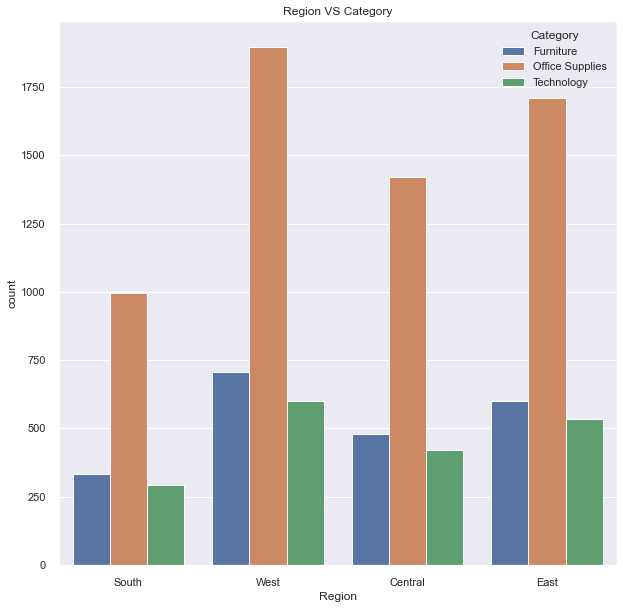

In [48]:
plt.figure(figsize=(10, 10))
sns.countplot(x = 'Region',hue='Category',data= retail)
plt.title('Region VS Category')
plt.show()

### Category VS Profit

Text(0.5, 1.0, 'Category VS Profit')

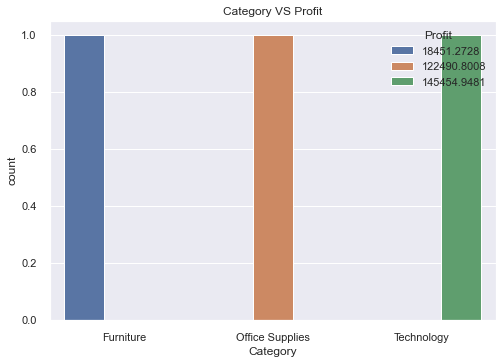

In [49]:
data = retail.groupby(["Category"]).Profit.sum().reset_index()
sns.countplot(x = 'Category',hue='Profit',data= data)
plt.title('Category VS Profit')

### Region VS Profit

Text(0.5, 1.0, 'Region VS Profit')

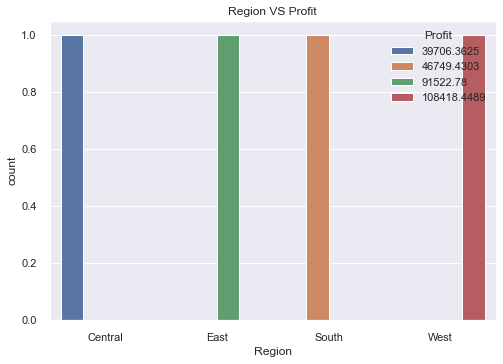

In [50]:
data = retail.groupby(["Region"]).Profit.sum().reset_index()
sns.countplot(x = 'Region',hue='Profit',data= data)
plt.title('Region VS Profit')

### Sales/Profit VS Category

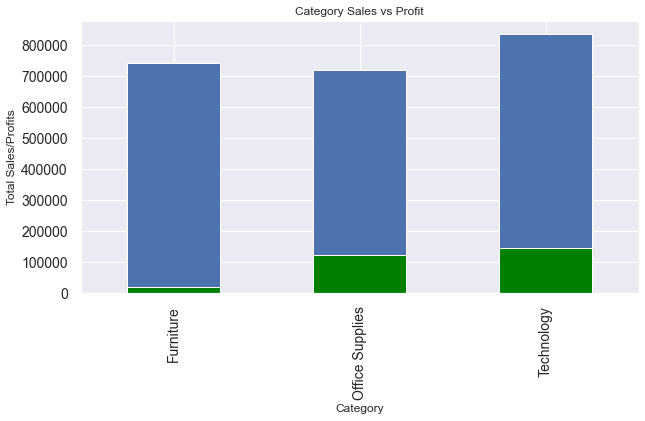

In [51]:
data = df.groupby(["Category"]).Sales.sum()
data2 = df.groupby(["Category"]).Profit.sum()
data.plot(kind='bar',figsize = (10,5),fontsize = 14)
data2.plot(kind='bar',figsize = (10,5),fontsize = 14,color='green')
plt.xlabel('Category')
plt.ylabel('Total Sales/Profits')
plt.title("Category Sales vs Profit")
plt.show()

### Sales/Profit VS Region

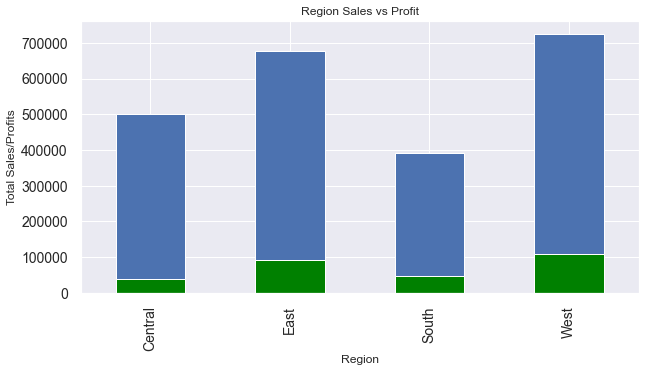

In [52]:
data = retail.groupby(["Region"]).Sales.sum()
data2 = df.groupby(["Region"]).Profit.sum()
data.plot(kind='bar',figsize = (10,5),fontsize = 14)
data2.plot(kind='bar',figsize = (10,5),fontsize = 14,color='green')
plt.xlabel('Region')
plt.ylabel('Total Sales/Profits')
plt.title("Region Sales vs Profit")
plt.show()

### Sales/Profit VS Segment

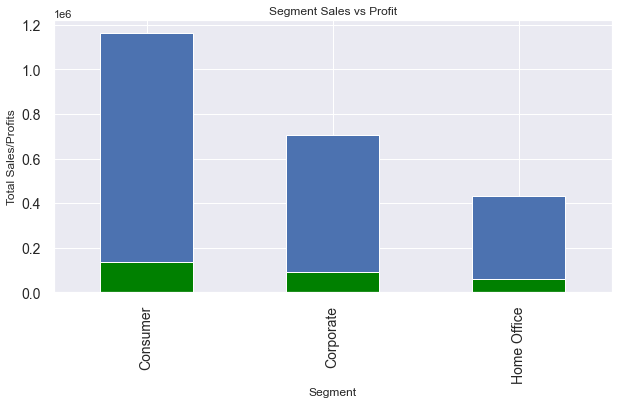

In [53]:
data = retail.groupby(["Segment"]).Sales.sum()
data2 = retail.groupby(["Segment"]).Profit.sum()
data.plot(kind='bar',figsize = (10,5),fontsize = 14)
data2.plot(kind='bar',figsize = (10,5),fontsize = 14,color='green')
plt.xlabel('Segment')
plt.ylabel('Total Sales/Profits')
plt.title("Segment Sales vs Profit")
plt.show()

### Segment VS Sub-Category

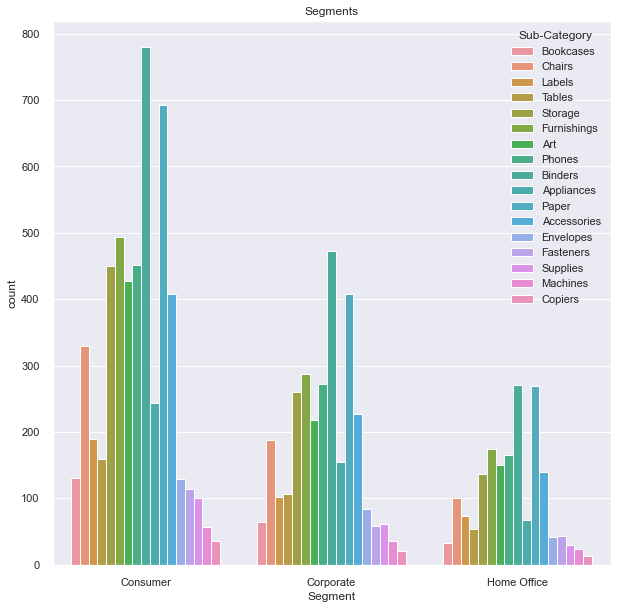

In [54]:
plt.figure(figsize=(10, 10))
sns.countplot(x = 'Segment',hue='Sub-Category',data= df)
plt.title('Segments')
plt.show()

### Sales/Profit VS Sub-Category

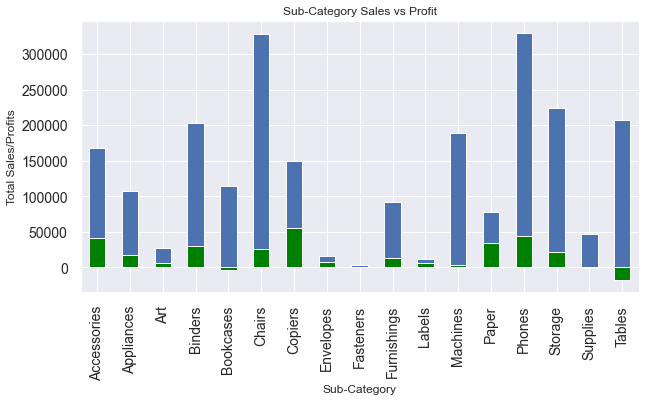

In [57]:
data = retail.groupby(["Sub-Category"]).Sales.sum()
data2 = retail.groupby(["Sub-Category"]).Profit.sum()
data.plot(kind='bar',figsize = (10,5),fontsize = 14)
data2.plot(kind='bar',figsize = (10,5),fontsize = 14,color='green')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales/Profits')
plt.title("Sub-Category Sales vs Profit")
plt.show()


### Profit/Discount VS Sub-Category

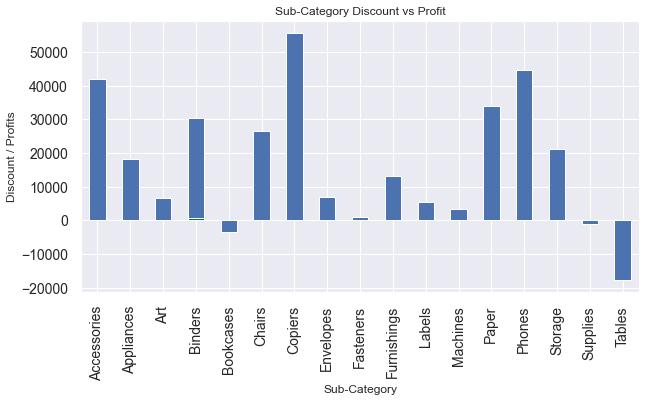

In [56]:
data = retail.groupby(["Sub-Category"]).Profit.sum()
data2 = retail.groupby(["Sub-Category"]).Discount.sum()
data.plot(kind='bar',figsize = (10,5),fontsize = 14)
data2.plot(kind='bar',figsize = (10,5),fontsize = 14,color='green')
plt.xlabel('Sub-Category')
plt.ylabel('Discount / Profits')
plt.title("Sub-Category Discount vs Profit")
plt.show()

### Discount VS Sales

Text(0.5, 1.0, 'Discount VS Sales')

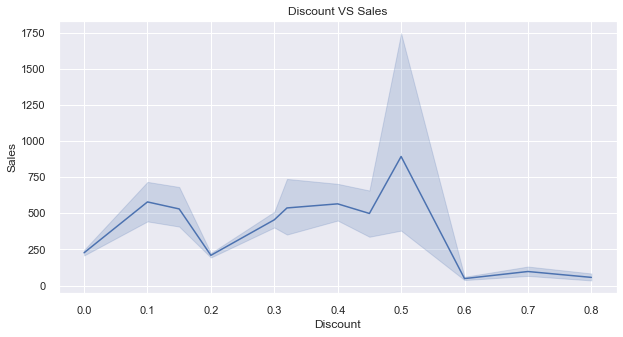

In [59]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Discount',y='Sales',data=retail)
plt.title('Discount VS Sales')

### Quantity VS Discount

Text(0.5, 1.0, 'Quantity VS Discount')

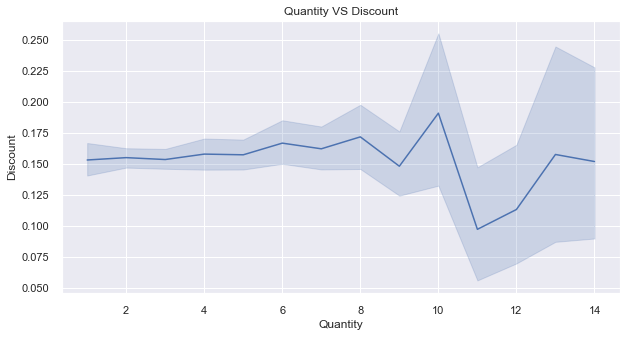

In [60]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Quantity',y='Discount',data=retail)
plt.title('Quantity VS Discount')

### Quantity VS Profit

Text(0.5, 1.0, 'Quantity Vs Profit')

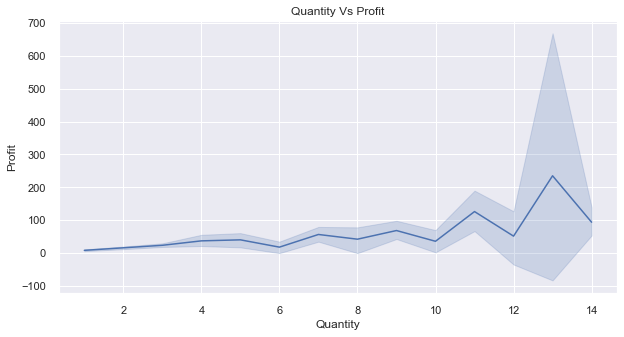

In [61]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Quantity',y='Profit',data=retail)
plt.title('Quantity Vs Profit')

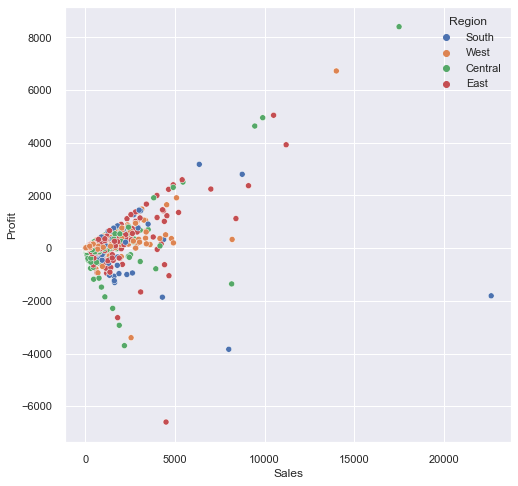

In [62]:
plt.figure(figsize=[8,8])
sns.set_theme()
sns.scatterplot(data = retail, x = 'Sales', y = 'Profit', hue = 'Region')
plt.show()


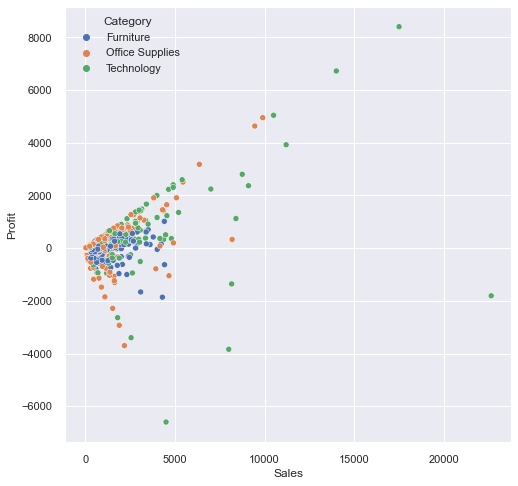

In [63]:
plt.figure(figsize=[8,8])
sns.set_theme()
sns.scatterplot(data = retail, x = 'Sales', y = 'Profit', hue = 'Category')
plt.show()


## Checking for outliers

In [64]:
retail.Profit.quantile([0,0.1,0.2,0.5,0.75,0.8,0.95,0.99,1])

0.00   -6599.978000
0.10     -15.473460
0.20       0.400320
0.50       8.666500
0.75      29.364000
0.80      41.038800
0.95     168.470400
0.99     580.657882
1.00    8399.976000
Name: Profit, dtype: float64

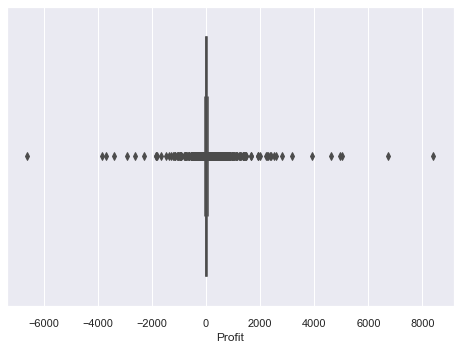

In [65]:
sns.boxplot(data = retail, x = 'Profit')
plt.show()

In [66]:
retail.Sales.quantile([0,0.1,0.2,0.5,0.75,0.8,0.95,0.99,1])

0.00        0.444000
0.10        7.897200
0.20       13.776000
0.50       54.490000
0.75      209.940000
0.80      281.372000
0.95      956.984245
0.99     2481.694600
1.00    22638.480000
Name: Sales, dtype: float64

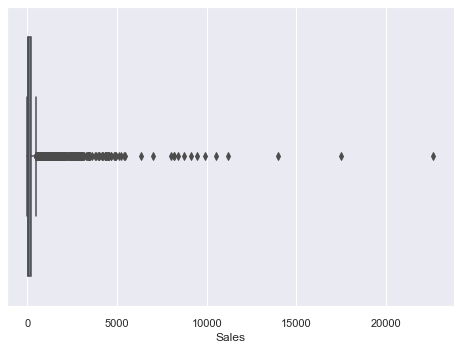

In [67]:
sns.boxplot(data = retail, x = 'Sales')
plt.show()

##### Sales and profits have outliers


### Capping the outliers between 5th and 99th percentile based on profit

In [68]:
df = retail[[all([a, b]) for a, b in zip(retail.Profit > retail.Profit.quantile(0.05), retail.Profit < retail.Profit.quantile(0.99))]]

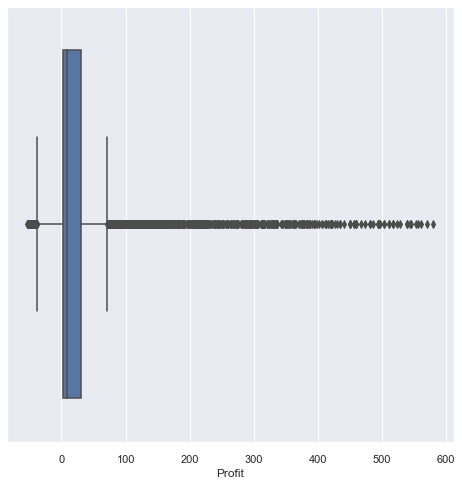

In [69]:
plt.figure(figsize = [8,8])
sns.boxplot(data = df, x = 'Profit')
plt.show()

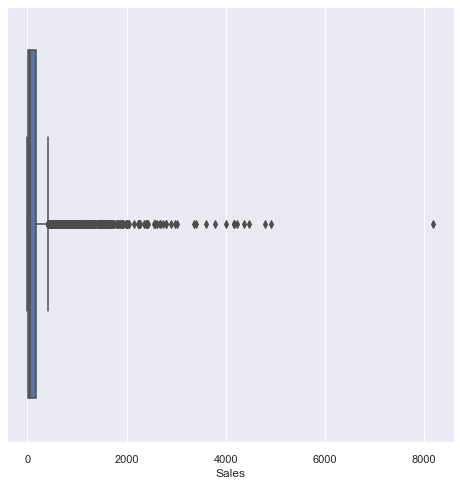

In [70]:
plt.figure(figsize = [8,8])
sns.boxplot(data = df, x = 'Sales')
plt.show()


# Analysing highest losses

In [71]:
top_10_loss = retail.sort_values(by = 'Profit', ascending = True).head(20)
top_10_loss

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,Lancaster,Ohio,East,Technology,Machines,4499.985,5,0.7,-6599.9780
683,Same Day,Corporate,Burlington,North Carolina,South,Technology,Machines,7999.980,4,0.5,-3839.9904
9774,Standard Class,Consumer,San Antonio,Texas,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
3011,Standard Class,Home Office,Louisville,Colorado,West,Technology,Machines,2549.985,5,0.7,-3399.9800
4991,Standard Class,Corporate,Chicago,Illinois,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845
3151,First Class,Consumer,Newark,Ohio,East,Technology,Machines,1799.994,2,0.7,-2639.9912
5310,First Class,Consumer,Houston,Texas,Central,Office Supplies,Binders,1525.188,6,0.8,-2287.7820
9639,Second Class,Consumer,Concord,North Carolina,South,Furniture,Tables,4297.644,13,0.4,-1862.3124
1199,Standard Class,Consumer,Houston,Texas,Central,Office Supplies,Binders,1088.792,4,0.8,-1850.9464
2697,Standard Class,Home Office,Jacksonville,Florida,South,Technology,Machines,22638.480,6,0.5,-1811.0784


In [72]:
top_10_loss.pivot_table(index = ['Category','Sub-Category'], aggfunc=np.sum).sort_values(by = 'Profit', 
                                                                                           ascending = True)

Discount      Profit  Quantity      Sales
Category        Sub-Category                                           
Technology      Machines           3.5 -19651.0100        30  47648.376
Office Supplies Binders            7.7 -18145.2688        53  13947.946
Furniture       Tables             0.4  -1862.3124        13   4297.644
                Bookcases          0.5  -1665.0522         7   3083.430
Office Supplies Appliances         0.8  -1181.2824         8    463.248
                Supplies           0.2  -1049.3406         7   4663.736

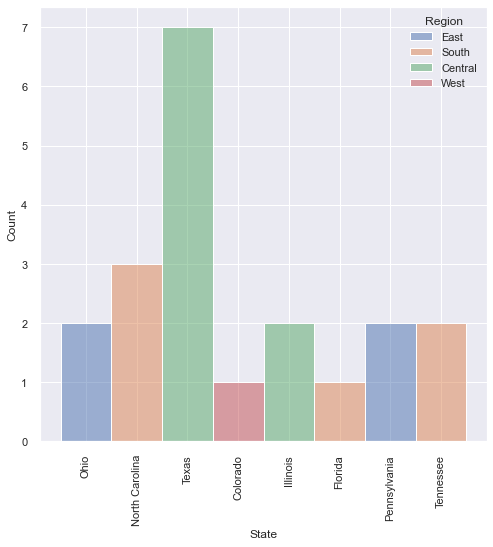

In [73]:
plt.figure(figsize = [8,8])
sns.set_theme()
sns.histplot(data = top_10_loss, x = 'State', hue = 'Region')
plt.xticks(rotation = 90)
plt.show()

# Analysing highest profits

In [74]:
top_10_profit = retail.sort_values(by = 'Profit', ascending = False).head(20)
top_10_profit

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,Lafayette,Indiana,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,Seattle,Washington,West,Technology,Copiers,13999.960,4,0.0,6719.9808
4190,Standard Class,Consumer,Newark,Delaware,East,Technology,Copiers,10499.970,3,0.0,5039.9856
9039,Standard Class,Consumer,Detroit,Michigan,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700
4098,Standard Class,Consumer,Minneapolis,Minnesota,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
2623,First Class,Home Office,New York City,New York,East,Technology,Copiers,11199.968,4,0.2,3919.9888
509,Standard Class,Consumer,Atlanta,Georgia,South,Office Supplies,Binders,6354.950,5,0.0,3177.4750
8488,Second Class,Consumer,Arlington,Virginia,South,Technology,Machines,8749.950,5,0.0,2799.9840
7666,Standard Class,Home Office,Providence,Rhode Island,East,Technology,Copiers,5399.910,9,0.0,2591.9568
6520,Second Class,Consumer,Jackson,Michigan,Central,Office Supplies,Binders,5443.960,4,0.0,2504.2216


In [75]:
top_10_profit.pivot_table(index = ['Category','Sub-Category'], aggfunc=np.sum).sort_values(by = 'Profit', 
                                                                                           ascending = False)

,,Discount,Profit,Quantity,Sales
Category,Sub-Category,,,,
Technology,Copiers,0.2,28974.8551,32,63499.688
Office Supplies,Binders,0.4,20715.8034,38,44574.506
Technology,Machines,0.0,15700.1377,34,41790.050


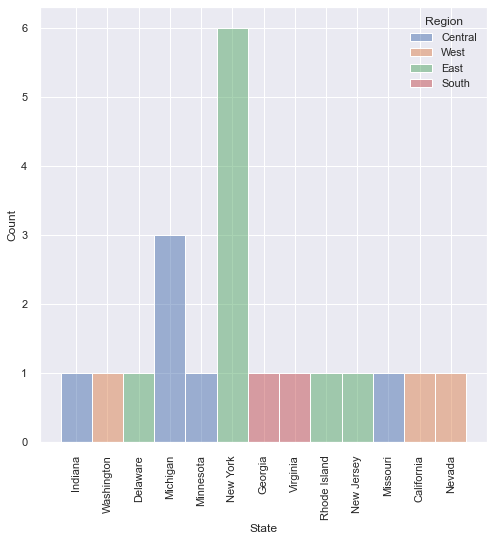

In [76]:
plt.figure(figsize = [8,8])
sns.set_theme()
sns.histplot(data = top_10_profit, x = 'State', hue = 'Region')
plt.xticks(rotation = 90)
plt.show()


# Inferences
Category & Sub-Category:
- The store has Copiers in Technology as their best sellers
- Binders are both very profitable and severely loss-making in the Office Supplies category.
- Machines in Technology Category are also both, highly profitable and highly loss incurring
- The discount that is being offered is the only substantial distinction between the items.
- High discounted items are incurring huge losses whereas the same items with no/low discounts are very profitable

Discounts:
- Based on the graph plotted between profits and discount, the highest profit is seen at 10% discount and the lowest is seen at 50%
- Anything above 25% discounted price has seen loss which keeps increasing with the discount provided
- It is recommended to keep the discounts at less than 30%
- It is advised to sell the items at a cost that does not need discounting

Regions and State:
- More losses are being observed in Texas and North Carolina.
- More profits are being observed in New York and Michigan.
- The states in Central and South are observing more losses and the ones in East are seeing more profits

# Conclusion
Standard Class Ship mode is the most preffered shipping mode by all the three segments

Office Supplies is the most ordered category by all the three segments. Also by region Analysis office supplies are more preferred

Technology is least bought category, Hence more focus should be given to technology sector and it can provide more sales then furniture sector

West region has placed most orders from all the four regions and has highest sales.

But South region has minimum number of orders , Hence more marketing should be done in the south region and less in west region.

Technology Sector has highest profit but has lowest sales , Hence more focus should be on Technology Sector.

Centeral region has lowest profit , so more schemes and focus should be given at centeral region to maximize profit.

Consumer Sector has maximum sales and profit.